#prediksi tren harga open saham menggunakan regresi metode extra trees regressor

#Import Library

Langkah pertama, adalah mengimport library yang akan digunakan untuk mengolah data. Pada tugas besar ini menggunakan library berikut:
1. pandas
2. Numpy
3. Matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import datetime 
import math # library terkait rumus matematika
import numpy as np

# Regresi
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Metode
from sklearn.ensemble import ExtraTreesRegressor

#Akusisi Data

 <p>Cara mendapatkan data dengan melakukan pengunduhan pada website https://finance.yahoo.com/</p>
<p>Data yang digunakan adalah data sekunder, yaitu data saham telkomsel dan smartfren yang masing-masing memiliki 171 record dengan rincian:</p>
<p> 1 Atribut Dependen:
<li> Tren Harga Open Saham
<p> 4 Atribut Independen:
<li> Harga Open Saham
<li> Harga Close Saham
<li> High
<li> Low


<h2>Exploratory Data Analysis

In [ ]:
dataset_telkom = pd.read_csv("TLKM.JK.Prediksi.csv", header=0, index_col='Date', parse_dates=True)
dataset_freen = pd.read_csv("FREN.JK.Prediksi.csv",  header=0, index_col='Date', parse_dates=True)

TELKM = dataset_telkom.values
FREEN = dataset_freen.values

<h3>Menampilkan data, kolom, dan tipe data

In [ ]:
# Menampilkan dataset Telkomsel
print(dataset_telkom)


# Menampilkan dataset Telkomsel Index 1
print(dataset_telkom.iloc[:,1])

              Open    High     Low   Close    Adj Close     Volume
Date                                                              
2020-07-24  3080.0  3080.0  3020.0  3020.0  2875.031494  137265100
2020-07-27  3020.0  3050.0  3020.0  3040.0  2894.071289   58708800
2020-07-28  3050.0  3050.0  3010.0  3020.0  2875.031494  102705300
2020-07-29  3030.0  3050.0  3000.0  3000.0  2855.991455  114352000
2020-07-30  3040.0  3050.0  3000.0  3050.0  2903.591309   95785000
...            ...     ...     ...     ...          ...        ...
2021-07-16  3140.0  3170.0  3110.0  3170.0  3170.000000   63626300
2021-07-19  3160.0  3230.0  3150.0  3220.0  3220.000000  116219500
2021-07-21  3190.0  3240.0  3180.0  3210.0  3210.000000  115099400
2021-07-22  3210.0  3260.0  3210.0  3260.0  3260.000000   48865700
2021-07-23  3250.0  3250.0  3150.0  3170.0  3170.000000   67128400

[240 rows x 6 columns]
Date
2020-07-24    3080.0
2020-07-27    3050.0
2020-07-28    3050.0
2020-07-29    3050.0
2020-07-30    30

In [ ]:
# Akses data Kolom telkomsel
print(dataset_telkom.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


<p> Note : Pada dataset saham telkomsel terdapat : 7 kolom, dimana 6 kolom merupakan data numerik dan 1 kolom merupakan data interval.

In [ ]:
# Tipe Data
dataset_telkom.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
# Menampilkan dataset Smartfren
print(dataset_freen)

# Menampilkan dataset Smartfren Index 1
print(dataset_freen.iloc[:,1])

           Date   Open   High    Low  Close  Adj Close      Volume
0    2020-07-24  107.0  139.0  106.0  139.0      139.0  2205588000
1    2020-07-27  143.0  168.0  138.0  142.0      142.0  2415778700
2    2020-07-28  142.0  151.0  134.0  138.0      138.0   853341600
3    2020-07-29  139.0  157.0  135.0  153.0      153.0  1524897900
4    2020-07-30  156.0  156.0  143.0  143.0      143.0   425144200
..          ...    ...    ...    ...    ...        ...         ...
235  2021-07-16  119.0  119.0  112.0  112.0      112.0   699076200
236  2021-07-19  112.0  115.0  108.0  113.0      113.0   374824600
237  2021-07-21  114.0  115.0  111.0  112.0      112.0   364884100
238  2021-07-22  112.0  114.0  111.0  113.0      113.0   343165200
239  2021-07-23  113.0  121.0  112.0  118.0      118.0  1329429100

[240 rows x 7 columns]
0      107.0
1      143.0
2      142.0
3      139.0
4      156.0
       ...  
235    119.0
236    112.0
237    114.0
238    112.0
239    113.0
Name: Open, Length: 240, dtyp

In [ ]:
# Akses data Kolom Smartfren
print(dataset_freen.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
# Tipe Data
dataset_freen.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

<h3>Memeriksa Missing Value

In [ ]:
# Memeriksa informasi variabel, termasuk ada yang null atau tidak
dataset_telkom.info()
dataset_freen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       240 non-null    object 
 1   Open       240 non-null    float64
 2   High       240 non-null    float64
 3   Low        240 non-null    float64
 4   Close      240 non-null    float64
 5   Adj Close  240 non-null    float64
 6   Volume     240 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       240 non-null    object 
 1   Open       240 non-null    float64
 2   High       240 non-null    float64
 3   Low        240 non-null    float64
 4   Close      240 non-null    float64
 5   Adj Close  240 non-null    float64
 6   Volume     240 non-null    int64  
dtypes: f

Terlihat bahwa pada setiap variabel yang ada pada dataset saham telkomsel, indosat dan smartfren tidak ada data yang null/kosong/missing.



#Statistik Data

**Informasi statistik data dengan NumPy**
<p>Mengetahui informasi statistik pada suatu data sangat penting. Mulai dari distribusi data, nilai max atau min, hingga standar deviasi dari suatu dataset. Jika datanya berjumlah dibawah 10 mungkin masih dikerjakan secara manual. Namun, bayangkan jika datanya sudah mencapai ratusan bahkan ribuan. Tidak mungkin pastinya untuk dilakukan secara manual.
Maka dari itu pentingnya fungsi describe() pada pandas.
Fungsi describe() ini memungkinkan untuk mengetahui informasi statistik dari suatu dataset secara cepat.

In [ ]:
# Data Telkomsel
dataset_telkom.describe()

Open         High  ...    Adj Close        Volume
count   240.000000   240.000000  ...   240.000000  2.400000e+02
mean   3174.166667  3214.083333  ...  3037.143216  1.403753e+08
std     259.607310   262.909361  ...   258.772793  8.840098e+07
min    2570.000000  2590.000000  ...  2437.112793  3.602920e+07
25%    3010.000000  3040.000000  ...  2855.991455  8.199498e+07
50%    3225.000000  3270.000000  ...  3106.755371  1.171756e+08
75%    3370.000000  3420.000000  ...  3227.270264  1.682619e+08
max    3610.000000  3640.000000  ...  3480.000000  6.241426e+08

[8 rows x 6 columns]

In [ ]:
# Data Smartfren
dataset_freen.describe()

Open        High         Low       Close   Adj Close        Volume
count  240.000000  240.000000  240.000000  240.000000  240.000000  2.400000e+02
mean    85.633333   88.904167   82.916667   85.450000   85.450000  1.147354e+09
std     20.907420   22.605105   20.058318   21.097839   21.097839  1.278699e+09
min     54.000000   57.000000   51.000000   54.000000   54.000000  5.727250e+07
25%     70.000000   72.750000   68.000000   70.000000   70.000000  3.848598e+08
50%     82.000000   85.000000   80.000000   82.000000   82.000000  7.167439e+08
75%     91.000000   93.000000   88.000000   91.000000   91.000000  1.393136e+09
max    156.000000  168.000000  143.000000  153.000000  153.000000  8.458832e+09

**Keterangan:**
<p><b>Fungsi describe<b> akan menampilkan informasi statistik untuk variabel numerik saja. Informasi statistik yang ditampilkan antara lain: 
<li>count menerangkan jumlah data
<li>mean untuk rata-rata
<li>std yaitu standar deviasi
<li>min yaitu nilai paling kecil kolom tersebut
<li>max adalah nilai terbesar kolom tersebut
<li>kuartil 25%, 50%, 75%.
<p>Fungsi describe tidak akan menampilkan informasi statistik untuk data bertipe object/ non numerik.
<p>Terlihat diatas bahwa varibel Date tidak ada deskripsi statistiknya.

##Kurva Skewness

<p> Menunjukkan distribusi data/ sebaran data. Skewness dapat diartikan sebagai kemiringan data. Maksud Kemiringan data adalah besarnya pembagian data atau rata-rata sebaran data. Skewness yang berbentuk lonceng menunjukkan data terdistribusi normal.
<p>Apabila kemiringan kurva skewness agak condong ke kanan ditunjukkan dengan nilai skewness yang negative,
Apabila kemiringan distribusi data condong ke kiri yang ditunjukkan bahwa nilai skewness positif.
<p>Apabila nilai skewness = 0, maka menunjukkan data berdistribusi normal,
skewness < 0 kemiringan ke kanan, dan skewness > 0 kemiringan ke kiri.
Sebagai contohnya, jika diperoleh nilai skewness = -0,807 maka skewness merupakan nilai negatif, akan tetapi tidak jauh dari nilai 0, berarti data cenderung berdistribusi normal atau hampir normal.
<p>Dalam Python, bisa menggunakan fungsi sk dari scipy untuk menampilkan nilai skewness data.
Jika belum menginstall scipy, lakukanimort scipy dahulu.

In [ ]:
# Library Kurva Skewness
import scipy
from scipy.stats import skew
# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Kurva Skewness Saham Telkomsel
data_tel = dataset_telkom.iloc[:,1:]
print("skewness = ", scipy.stats.skew(data_tel))

skewness =  [-0.61797431 -0.59605504 -0.641571   -0.61417945 -0.64581026  2.19878535]


Open
-0.6179743107299902


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


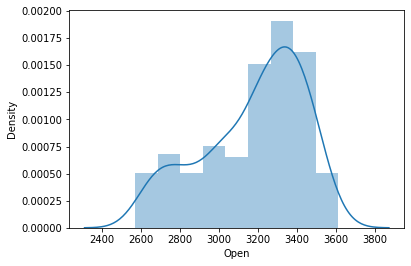

High
-0.596055041588745


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


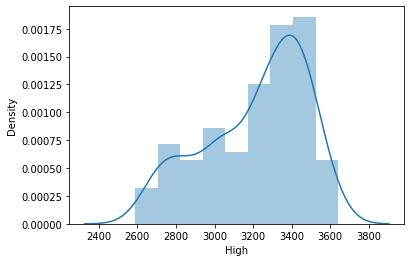

Low
-0.6415710032037522


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


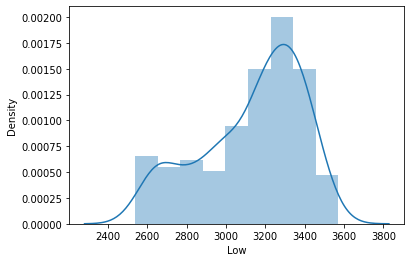

Close
-0.6141794511471357


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


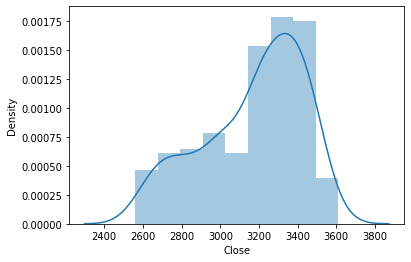

Adj Close
-0.6458102567278031


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


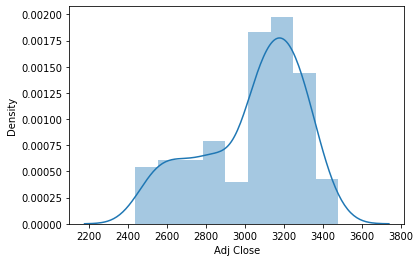

Volume
2.198785350636203


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


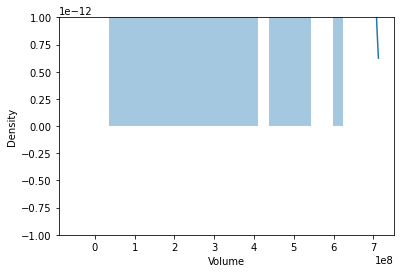

In [ ]:
# Visualisasi Skewness Saham Telkomsel
data_tel = dataset_telkom.iloc[:,1:]
for kolom in data_tel:
    print(kolom)
    print(skew(data_tel[kolom]))
    
    plt.figure
    sns.distplot(data_tel[kolom])
    plt.show()

In [ ]:
# Kurva Skewness Saham Smartfren
data_fren = dataset_freen.iloc[:,1:]
print("skewness = ", scipy.stats.skew(data_fren))

skewness =  [1.13749066 1.22114924 1.09032113 1.13208423 1.13208423 2.83987631]


Open
1.1374906633994917


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


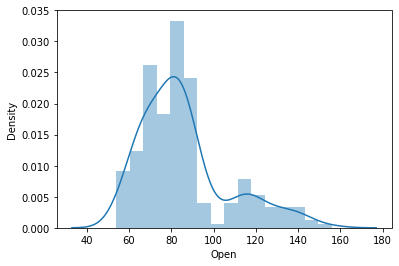

High
1.2211492445271381


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


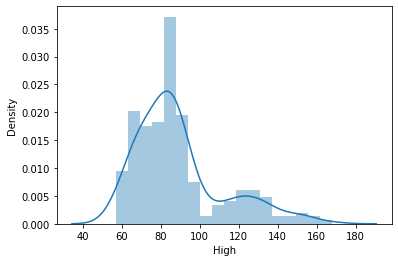

Low
1.090321126047559


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


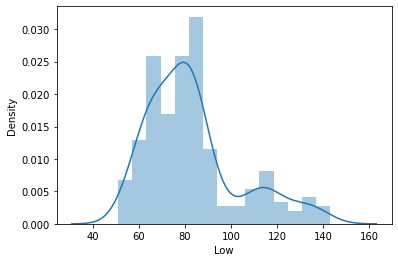

Close
1.1320842285899806


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


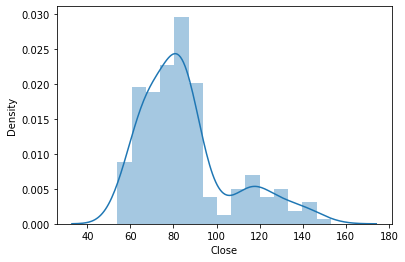

Adj Close
1.1320842285899806


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


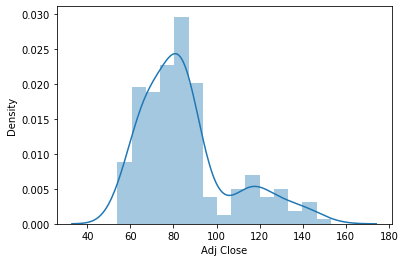

Volume
2.839876314217109


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


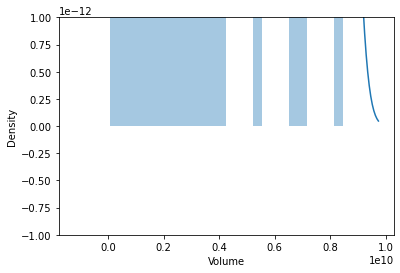

In [ ]:
# Visualisasi Skewness Saham Smartfren
data_fren = dataset_freen.iloc[:,1:]
for kolom in data_fren:
    print(kolom)
    print(skew(data_fren[kolom]))
    
    plt.figure
    sns.distplot(data_fren[kolom])
    plt.show()

<h3>Outlier

In [ ]:
# Library Outlier
import seaborn as sns

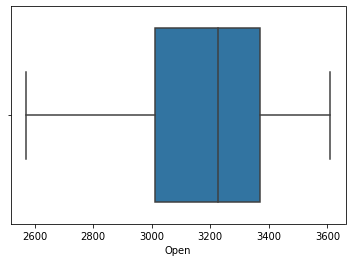

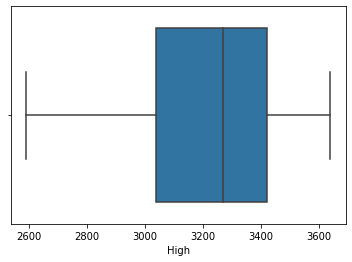

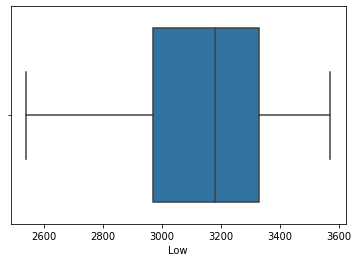

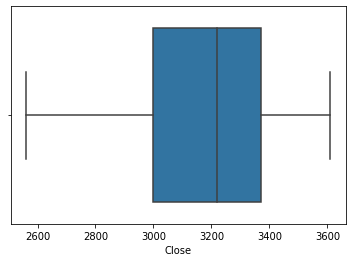

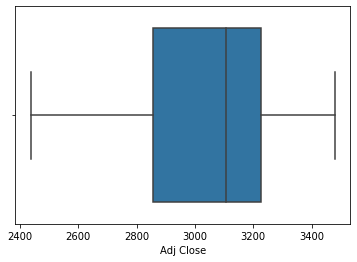

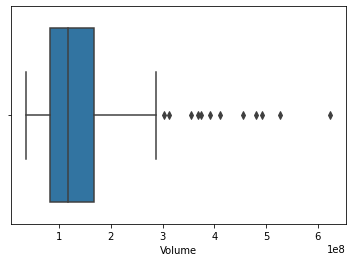

In [ ]:
# Outlier Saham Telkomsel
for kolom in data_tel:
  plt.figure() # Membuat figure baru
  sns.boxplot(x=data_tel[kolom])
  plt.show()

Pada kolom Open tidak memiliki data outlier, karena tidak ada data yang melebihi atau melewati dari batas minimun (LQ - (1,5 x IQR)) dan atau maximum (UQ + (1,5 x IQR)).

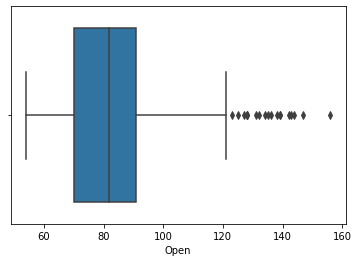

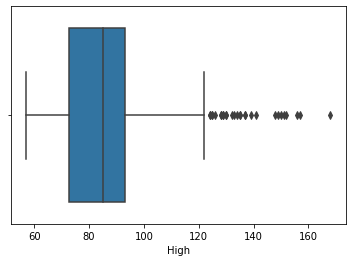

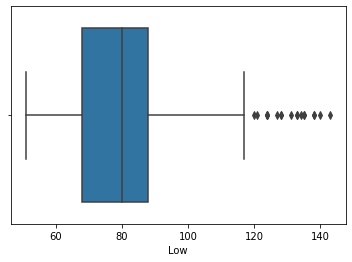

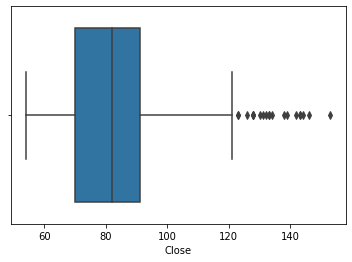

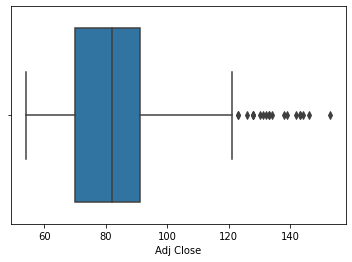

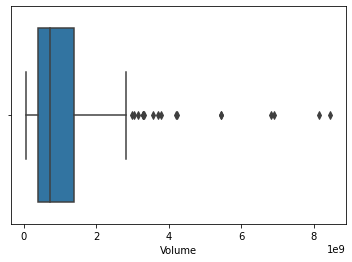

In [ ]:
# Outlier Saham Smartfren
for kolom in data_fren:
  plt.figure() # Membuat figure baru
  sns.boxplot(x=data_fren[kolom])
  plt.show()

Adanya outlier bisa dipengaruhi karena perbedaan titik nilai data terlalu signifikan dari data lainnya, bisa dilihat pada harga open, high, low, dan close pada saham indosat dan smartfren terjadi penurunan yang terlalu signifikan. Data ini diambil dari jangka waktu  maret 2020 - november 2020, jika melihat kondisi saat itu awal masuknya Covid-19 di indonesia, yang kita ketahui bersama membuat sektor industri merosot akibat dampak psbb dan panik investor sehingga harga saham menurun drastis nah penurunan drastis inilah yang membuat outlier pada data.

In [ ]:
# Cara mengecek adanya outlier Telkomsel

for kolom in data_tel:
  q1,q3 = np.percentile(data_fren['Volume'],[25,75])
  
  iqr = q3-q1
  batas_min = q1-(1.5*iqr)
  batas_max = q3+(1.5*iqr)
  batas_min_ekstrim = q1-(3*iqr)
  batas_max_ekstrim = q3+(3*iqr)
  
  outlier_bwh = data_fren[(data_fren['Volume']>=batas_min_ekstrim) & (data_fren['Volume']<batas_min)]
  outlier_ats = data_fren[(data_fren['Volume']>batas_max) & (data_fren['Volume']<batas_max_ekstrim)]

In [ ]:
outlier_ats

Open   High    Low  Close  Adj Close      Volume
78    66.0   73.0   64.0   68.0       68.0  3572010200
80    71.0   77.0   70.0   74.0       74.0  3158096100
91    80.0   83.0   74.0   75.0       75.0  4234638200
93    74.0   80.0   74.0   76.0       76.0  4186358900
111   66.0   73.0   64.0   73.0       73.0  2973514600
142   76.0   80.0   73.0   77.0       77.0  3285619400
145   81.0   86.0   79.0   86.0       86.0  3296692800
146   86.0   90.0   82.0   89.0       89.0  3330091900
175   93.0   97.0   92.0   95.0       95.0  3295158500
211   84.0   95.0   84.0   94.0       94.0  3779152600
212   94.0  101.0   91.0   96.0       96.0  3716408400
226  115.0  129.0  114.0  123.0      123.0  3028953400

In [ ]:
# Cara mengecek adanya outlier Smartfren

for kolom in data_fren:
  q1,q3 = np.percentile(data_fren['Open'],[25,75])
  
  iqr = q3-q1
  batas_min = q1-(1.5*iqr)
  batas_max = q3+(1.5*iqr)
  batas_min_ekstrim = q1-(3*iqr)
  batas_max_ekstrim = q3+(3*iqr)
  
  outlier_bwh = data_fren[(data_fren['Open']>=batas_min_ekstrim) & (data_fren['Open']<batas_min)]
  outlier_ats = data_fren[(data_fren['Open']>batas_max) & (data_fren['Open']<batas_max_ekstrim)]

In [ ]:
outlier_ats

Open  High  Low  Close
87   143   168  138    142
88   142   151  134    138
89   139   157  135    153
90   156   156  143    143
91   139   141  133    133
93   136   148  135    144
94   138   152  138    146
95   147   150  140    143
96   144   149  133    133

In [ ]:
# Cara mengecek adanya outlier Smartfren

for kolom in data_fren:
  q1,q3 = np.percentile(data_fren['High'],[25,75])
  
  iqr = q3-q1
  batas_min = q1-(1.5*iqr)
  batas_max = q3+(1.5*iqr)
  batas_min_ekstrim = q1-(3*iqr)
  batas_max_ekstrim = q3+(3*iqr)
  
  outlier_bwh = data_fren[(data_fren['High']>=batas_min_ekstrim) & (data_fren['High']<batas_min)]
  outlier_ats = data_fren[(data_fren['High']>batas_max) & (data_fren['High']<batas_max_ekstrim)]

In [ ]:
outlier_ats

Open  High  Low  Close
87   143   168  138    142
88   142   151  134    138
89   139   157  135    153
90   156   156  143    143
91   139   141  133    133
93   136   148  135    144
94   138   152  138    146
95   147   150  140    143
96   144   149  133    133

In [ ]:
for kolom in data_fren:
  q1,q3 = np.percentile(data_fren['Low'],[25,75])
  
  iqr = q3-q1
  batas_min = q1-(1.5*iqr)
  batas_max = q3+(1.5*iqr)
  batas_min_ekstrim = q1-(3*iqr)
  batas_max_ekstrim = q3+(3*iqr)
  
  outlier_bwh = data_fren[(data_fren['Low']>=batas_min_ekstrim) & (data_fren['Low']<batas_min)]
  outlier_ats = data_fren[(data_fren['Low']>batas_max) & (data_fren['Low']<batas_max_ekstrim)]

In [ ]:
outlier_ats

Open  High  Low  Close
87   143   168  138    142
89   139   157  135    153
90   156   156  143    143
93   136   148  135    144
94   138   152  138    146
95   147   150  140    143

In [ ]:
for kolom in data_fren:
  q1,q3 = np.percentile(data_fren['Close'],[25,75])
  
  iqr = q3-q1
  batas_min = q1-(1.5*iqr)
  batas_max = q3+(1.5*iqr)
  batas_min_ekstrim = q1-(3*iqr)
  batas_max_ekstrim = q3+(3*iqr)
  
  outlier_bwh = data_fren[(data_fren['Close']>=batas_min_ekstrim) & (data_fren['Close']<batas_min)]
  outlier_ats = data_fren[(data_fren['Close']>batas_max) & (data_fren['Close']<batas_max_ekstrim)]

In [ ]:
outlier_ats

Open  High  Low  Close
86   107   139  106    139
87   143   168  138    142
88   142   151  134    138
89   139   157  135    153
90   156   156  143    143
93   136   148  135    144
94   138   152  138    146
95   147   150  140    143

In [ ]:
for kolom in data_fren:
  q1,q3 = np.percentile(data_fren['Adj Close'],[25,75])
  
  iqr = q3-q1
  batas_min = q1-(1.5*iqr)
  batas_max = q3+(1.5*iqr)
  batas_min_ekstrim = q1-(3*iqr)
  batas_max_ekstrim = q3+(3*iqr)
  
  outlier_bwh = data_fren[(data_fren['Adj Close']>=batas_min_ekstrim) & (data_fren['Adj Close']<batas_min)]
  outlier_ats = data_fren[(data_fren['Adj Close']>batas_max) & (data_fren['Adj Close']<batas_max_ekstrim)]

In [ ]:
outlier_ats

Open   High    Low  Close  Adj Close      Volume
0    107.0  139.0  106.0  139.0      139.0  2205588000
1    143.0  168.0  138.0  142.0      142.0  2415778700
2    142.0  151.0  134.0  138.0      138.0   853341600
3    139.0  157.0  135.0  153.0      153.0  1524897900
4    156.0  156.0  143.0  143.0      143.0   425144200
5    139.0  141.0  133.0  133.0      133.0   139234000
6    125.0  137.0  124.0  132.0      132.0   431996200
7    136.0  148.0  135.0  144.0      144.0   843424400
8    138.0  152.0  138.0  146.0      146.0   364580700
9    147.0  150.0  140.0  143.0      143.0   167540500
10   144.0  149.0  133.0  133.0      133.0   519498300
11   135.0  135.0  124.0  130.0      130.0   784675900
12   132.0  133.0  127.0  128.0      128.0   218484900
216  115.0  128.0  115.0  126.0      126.0  2828068500
217  127.0  132.0  124.0  128.0      128.0  2224272500
218  128.0  135.0  128.0  134.0      134.0  1830801400
219  134.0  137.0  131.0  131.0      131.0  1329081100
220  131.0  134.0  128.0  128.0      128.0  1418651000
222  120.0  126.0  117.0  123.0      123.0  2663683600
226  115.0  129.0  114.0  123.0      123.0  3028953400

In [ ]:
for kolom in data_fren:
  q1,q3 = np.percentile(data_fren['Volume'],[25,75])
  
  iqr = q3-q1
  batas_min = q1-(1.5*iqr)
  batas_max = q3+(1.5*iqr)
  batas_min_ekstrim = q1-(3*iqr)
  batas_max_ekstrim = q3+(3*iqr)
  
  outlier_bwh = data_fren[(data_fren['Volume']>=batas_min_ekstrim) & (data_fren['Volume']<batas_min)]
  outlier_ats = data_fren[(data_fren['Volume']>batas_max) & (data_fren['Volume']<batas_max_ekstrim)]

In [ ]:
outlier_ats

Open   High    Low  Close  Adj Close      Volume
78    66.0   73.0   64.0   68.0       68.0  3572010200
80    71.0   77.0   70.0   74.0       74.0  3158096100
91    80.0   83.0   74.0   75.0       75.0  4234638200
93    74.0   80.0   74.0   76.0       76.0  4186358900
111   66.0   73.0   64.0   73.0       73.0  2973514600
142   76.0   80.0   73.0   77.0       77.0  3285619400
145   81.0   86.0   79.0   86.0       86.0  3296692800
146   86.0   90.0   82.0   89.0       89.0  3330091900
175   93.0   97.0   92.0   95.0       95.0  3295158500
211   84.0   95.0   84.0   94.0       94.0  3779152600
212   94.0  101.0   91.0   96.0       96.0  3716408400
226  115.0  129.0  114.0  123.0      123.0  3028953400

In [ ]:
outlier_bwh

Empty DataFrame
Columns: [Open, High, Low, Close]
Index: []

<h3> Handling Outlier

<p> sebenarnya untuk handling outlier ada dua kemungkinan diremove pake percentil outliernya atau dibiarkan saja disini sebenarnya kalo kita analisis lebih lanjut mengenai datanya sebenarnya outlier pada harga open, high, low, close pada saham sangat mungkin berada pada kisaran harga tersebut, karena beberapa faktor terutama saat itu covid masuk dan investor panik sehingga benar-benar harga saham itu menurun drastis.
<p>jadi kesimpulannya outlier pada dataset indosat dan 
smartfren itu tidak masalah kalaupun ditidak dihandling soalnya untuk kevalidan dan kerasionalnya, jika dibilang apakah mungkin harga close saham pada smartfren seharga 139 perlembar pada baris ke 86, jawabannya iya mungkin, mengapa? karena memang harga opennya kan 107 lalu harga highnya 139 dan ditutup pada harga 139 perlembar hari itu.
<p>apakah logis harga sahamnya segitu?, logis saja saat itu kondisi lagi krisis harga saham menurun gak cuma harga saham smartfren saham lain juga banyak yang turun jadi masih logis datanya.

#Manipulasi Dataset

<p> kita buat dataframe baru dengan memanipulasi dataset
<p> 1. CHG = %change atau berapa persen perubahan dari harga pembukaan hingga harga penutupan pada satu hari tertentu.
<p> 2. SPV =  Spread/Volatility merupakan tingkat pertimbangan Investor dalam investasi, investor lebih menyukai kondisi volatilitas tinggi ini karena
memungkinkan mereka memperoleh tingkat pengembalian yang lebih tinggi pula.

In [ ]:
#manipulasi dataframe Telkomsel
dataset_telkom['SPV'] = ((dataset_telkom['High'] - dataset_telkom['Low']) / dataset_telkom['Close'] * 100.0) # Spread/Volatility
dataset_telkom['CHG'] = ((dataset_telkom['Close'] - dataset_telkom['Open']) / dataset_telkom['Open'] * 100.0) #  % change
dataset_telkom = dataset_telkom[['Open','CHG','SPV','Volume']] # definisi dataframe yang baru

In [ ]:
dataset_telkom

Open       CHG       SPV     Volume
0    3080.0 -1.948052  1.986755  137265100
1    3020.0  0.662252  0.986842   58708800
2    3050.0 -0.983607  1.324503  102705300
3    3030.0 -0.990099  1.666667  114352000
4    3040.0  0.328947  1.639344   95785000
..      ...       ...       ...        ...
235  3140.0  0.955414  1.892744   63626300
236  3160.0  1.898734  2.484472  116219500
237  3190.0  0.626959  1.869159  115099400
238  3210.0  1.557632  1.533742   48865700
239  3250.0 -2.461538  3.154574   67128400

[240 rows x 4 columns]

In [ ]:
#Manipulasi dataframe Smartfren
dataset_freen['SPV'] = ((dataset_freen['High'] - dataset_freen['Low']) / dataset_freen['Close'] * 100.0) # Spread/Volatility
dataset_freen['CHG'] = ((dataset_freen['Close'] - dataset_freen['Open']) / dataset_freen['Open'] * 100.0) #  % change
dataset_freen= dataset_freen[['Open','CHG','SPV','Volume']] # definisi dataframe yang baru

In [ ]:
dataset_freen

Open        CHG        SPV      Volume
0    107.0  29.906542  23.741007  2205588000
1    143.0  -0.699301  21.126761  2415778700
2    142.0  -2.816901  12.318841   853341600
3    139.0  10.071942  14.379085  1524897900
4    156.0  -8.333333   9.090909   425144200
..     ...        ...        ...         ...
235  119.0  -5.882353   6.250000   699076200
236  112.0   0.892857   6.194690   374824600
237  114.0  -1.754386   3.571429   364884100
238  112.0   0.892857   2.654867   343165200
239  113.0   4.424779   7.627119  1329429100

[240 rows x 4 columns]

#Preprocessing

##Data Cleaning

In [ ]:
from sklearn.preprocessing import MinMaxScaler

<p> Sebelumnya, kita sudah membuat tabel/dataframe baru yang berisi harga penutupan (Close), Spread per Volatility (SPV), perubahan atau change dalam % (CHG) dan Volume. Selanjutnya, kita akan lakukan “data cleaning” atau pembersihan data sederhana. Jika tidak ada data ataupun data bukanlah suatu angka (not a number atau nan), maka ganti nilai tersebut dengan -99999 sehingga nantinya error tidak akan terjadi. Nilai -999999 diberikan agar machine learning membaca data tersebut sebagai outlier atau data yang bernilai ekstrim yang dapat diabaikan. Gunakan code dengan syntax berikut untuk melakukannya:

In [ ]:
#cleaning dataset telkomsel
dataset_telkom.fillna(value=-99999, inplace=True) # berikan nilai -999999 untuk data yang "not a number"

In [ ]:
#cleaning dataset smartfren
dataset_freen.fillna(value=-99999, inplace=True) # berikan nilai -999999 untuk data yang "not a number"

Setelah itu, kita akan tentukan berapa jumlah data yang akan kita prediksi. Pada tutorial ini, kita pakai nilai dalam persen untuk menentukan jumlah sampel prediksi. Kita pilih 10 persen data saja. Jadi,  kita punya 240 data, yang akan kita prediksi adalah 24 sampel data. Oleh karena itu, kita akan geser atau hapus 10 persen data terakhir dengan cara shifting. Data yang kita shifting hanya data penutupan harga (Open) karena data tersebut nantinya akan kita prediksi.

In [ ]:
#Shifting dataset Telkomsel
jumlah_hasil_prediksi = int(math.ceil(0.1*len(dataset_telkom))) # 10 persen / 100 = 0.1
dataset_telkom['hasil_prediksi'] = dataset_telkom['Open'].shift(-jumlah_hasil_prediksi) 
# menggeser tabel kolom "Open" ke atas sehingga beberapa nilai terakhir menjadi NaN


<p>Dataframe sampel prediksi (dataset_telkom[‘hasil_prediksi’]) dan (dataset_freen[‘hasil_prediksi2’]) yang merupakan hasil pergeseran/shifting dari (dataset_telkom[‘Open’]) dan (dataset_freen[‘Open’]) jika ditampilkan maka 24 data terakhirnya bernilai “not a number”.

<p> Kita definisikan "data_tel"  dan "data_fren" yaitu dataframe dengan data Open, SPV, CHG dan Volume. Jadi "data_tel" dan "data_fren" adalah seluruh data tabel kecuali “hasil_prediksi” dan "hasil_prediksi2" sehingga kita bisa definisikan "data_tel" dan "data_fren" dengan menghilangkan kolom “hasil_prediksi” dan "hasil_prediksi2 dengan syntax “drop”.

In [ ]:
#drop hasil prediksi data telkomsel
X= np.array(dataset_telkom.drop(['hasil_prediksi'],1)) # data_tel tidak termasuk kolom "hasil_prediksi"

##Normalisasi data

In [ ]:
#normalisasi data telkomsel
#Scale the all of the data to be values between -1 and 1 
scaler = MinMaxScaler(feature_range=(-1, 1)) 
scaled_telkom = scaler.fit_transform(X)

##Membuat data training dan testing Telkomsel

<p> Lalu definisikan variabel telkom_prediksi dan fren_prediksi yang beranggotakan 24 elemen dan data_tel dan data_fren adalah seluruh data kecuali 24 elemen terakhir. 
<p>Dengan arti lain, telkom_prediksi dan fren_prediksi adalah 10 persen dari keseluruhan data dan data_tel dan data_fren adalah 90 persen dari keseluruhan data.

In [ ]:
X_prediksi = X[-jumlah_hasil_prediksi:] # data telkom untuk prediksi (10 persen elemen terakhir)
X = X[:-jumlah_hasil_prediksi] # data telkom (90 persen elemen)

In [ ]:
X

array([[ 3.08000000e+03, -1.94805195e+00,  1.98675497e+00,
         1.37265100e+08],
       [ 3.02000000e+03,  6.62251656e-01,  9.86842105e-01,
         5.87088000e+07],
       [ 3.05000000e+03, -9.83606557e-01,  1.32450331e+00,
         1.02705300e+08],
       [ 3.03000000e+03, -9.90099010e-01,  1.66666667e+00,
         1.14352000e+08],
       [ 3.04000000e+03,  3.28947368e-01,  1.63934426e+00,
         9.57850000e+07],
       [ 3.06000000e+03, -4.57516340e+00,  7.19178082e+00,
         2.55659800e+08],
       [ 2.97000000e+03, -6.73400673e-01,  1.69491525e+00,
         9.60180000e+07],
       [ 2.96000000e+03,  2.02702703e+00,  3.97350993e+00,
         1.20719100e+08],
       [ 3.05000000e+03, -9.83606557e-01,  1.65562914e+00,
         7.16990000e+07],
       [ 3.02000000e+03, -1.32450331e+00,  2.01342282e+00,
         7.83472000e+07],
       [ 3.00000000e+03, -1.00000000e+00,  1.68350168e+00,
         6.54854000e+07],
       [ 2.98000000e+03, -1.67785235e+00,  2.38907850e+00,
      

Nilai y  adalah nilai dataframe “hasil_prediksi” dan "hasil_prediksi2" yang digeser sebelumnya namun tidak termasuk nilai yang “not a number”. Jadi, nilai “not a number” harus di “drop” terlebih dahulu.

In [ ]:
#drop data nan dataset telkomsel
dataset_telkom.dropna(inplace=True) # drop/hilangkan nilai yang "not a number"/NaN
y= np.array(dataset_telkom['hasil_prediksi']) # y_tel adalah nilai hasil prediksi

In [ ]:
y

array([2900., 2950., 2850., 2870., 2890., 2850., 2800., 2670., 2830.,
       2890., 2810., 2810., 2850., 2890., 2790., 2770., 2750., 2720.,
       2710., 2690., 2630., 2600., 2750., 2690., 2680., 2650., 2670.,
       2710., 2750., 2730., 2730., 2800., 2780., 2800., 2710., 2680.,
       2670., 2710., 2630., 2640., 2590., 2570., 2600., 2630., 2800.,
       2860., 2950., 2900., 3080., 3010., 3040., 3100., 3200., 3150.,
       3190., 3230., 3350., 3370., 3280., 3480., 3460., 3230., 3270.,
       3330., 3270., 3280., 3350., 3270., 3270., 3300., 3320., 3500.,
       3610., 3500., 3530., 3500., 3350., 3370., 3500., 3420., 3320.,
       3480., 3470., 3390., 3450., 3590., 3600., 3550., 3480., 3510.,
       3480., 3470., 3420., 3500., 3420., 3370., 3360., 3340., 3280.,
       3290., 3130., 3300., 3250., 3270., 3320., 3300., 3250., 3180.,
       3220., 3200., 3200., 3220., 3190., 3180., 3210., 3200., 3490.,
       3510., 3450., 3490., 3490., 3480., 3420., 3340., 3360., 3370.,
       3340., 3440.,

#Extra Trees Telkomsel

###Fungsi

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [ ]:
#metode extratrees regresi
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(x_train, y_train)
reg.score(x_test, y_test)

0.7122656146158916

In [ ]:
#prediksi harga saham selama 24 hari berturut-turut
set_prediksi = reg.predict(X_prediksi) # prediksi nilai y (output)
print(set_prediksi)

[3418.4 3359.8 3277.4 3360.7 3388.8 3342.1 3459.2 3326.9 3392.9 3441.5
 3039.1 3116.  2810.2 2863.2 3383.3 3404.  3332.  2864.7 3163.5 3352.7
 3334.6 3435.5 3414.2 3325.7]


##membuat grafik

In [ ]:
dataset_telkom['Prediksi'] = np.nan

In [ ]:
tanggal_terakhir = dataset_telkom.iloc[-1].name # dapatkan tanggal terakhir

In [ ]:
detik_terakhir = tanggal_terakhir
satu_hari = 86400 # detik =  1 hari
detik_selanjutnya = detik_terakhir + satu_hari

In [ ]:
for i in set_prediksi: # untuk semua nilai yang telah di prediksi
    tanggal_selanjutnya = detik_selanjutnya #hitung tanggal selanjutnya
    detik_selanjutnya += 86400 # tambahkan detik selanjutnya menjadi satu hari berikutnya
    dataset_telkom.loc[tanggal_selanjutnya] = [np.nan for _ in range(len(dataset_telkom.columns)-1)]+[i] 
    # tambahkan elemen i (nilai prediksi)

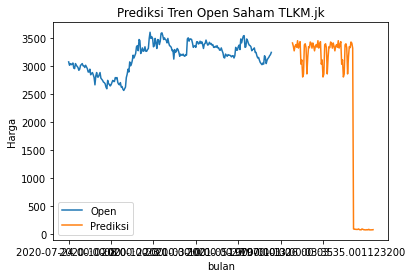

In [162]:
dataset_telkom['Open'].plot()
dataset_telkom['Prediksi'].plot()
plt.legend()
plt.xlabel('bulan')
plt.ylabel('Harga')
plt.title('Prediksi Tren Open Saham TLKM.jk')
plt.show()


#Extratrees Smartfren

In [ ]:
#Shifting dataset Smartfren
jumlah_hasil_prediksi2 = int(math.ceil(0.1*len(dataset_freen))) # 10 persen / 100 = 0.1
dataset_freen['hasil_prediksi2'] = dataset_freen['Open'].shift(-jumlah_hasil_prediksi2) 
# menggeser tabel kolom "Open" ke atas sehingga beberapa nilai terakhir menjadi NaN

In [ ]:
#drop hasil prediksi data telkomsel
X = np.array(dataset_freen.drop(['hasil_prediksi2'],1)) # x tidak termasuk kolom "hasil_prediksi2"

In [ ]:
#Scale the all of the data to be values between -1 and 1 
scaler = MinMaxScaler(feature_range=(-1, 1)) 
scaled_fren = scaler.fit_transform(X)

In [ ]:
X_prediksi = X[-jumlah_hasil_prediksi2:] # data smartfren untuk prediksi (10 persen elemen terakhir)
X = X[:-jumlah_hasil_prediksi2] # data smartfren (90 persen elemen)

In [ ]:
#drop data nan dataset Smartfren
dataset_freen.dropna(inplace=True) # drop/hilangkan nilai yang "not a number"/NaN
y= np.array(dataset_freen['hasil_prediksi2']) # y adalah nilai hasil prediksi

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [ ]:
#metode extratrees regresi
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(x_train, y_train)
reg.score(x_test, y_test)

0.45475717831293416

In [ ]:
#prediksi harga saham selama 24 hari berturut-turut
set_prediksi = reg.predict(X_prediksi) # prediksi nilai y (output)
print(set_prediksi)

[95.55 89.91 89.49 86.74 86.9  86.88 94.96 81.91 81.19 78.47 95.36 88.95
 81.41 79.51 78.32 78.59 82.48 77.61 88.42 77.7  79.26 78.99 79.05 81.7 ]


##Membuat Grafik

In [ ]:
dataset_freen['Prediksi'] = np.nan

In [ ]:
tanggal_terakhir = dataset_telkom.iloc[-1].name # dapatkan tanggal terakhir

In [ ]:
detik_terakhir = tanggal_terakhir
satu_hari = 86400 # detik =  1 hari
detik_selanjutnya = detik_terakhir + satu_hari

In [ ]:
for i in set_prediksi: # untuk semua nilai yang telah di prediksi
    tanggal_selanjutnya = detik_selanjutnya#hitung tanggal selanjutnya
    detik_selanjutnya += 86400 # tambahkan detik selanjutnya menjadi satu hari berikutnya
    dataset_freen.loc[tanggal_selanjutnya] = [np.nan for _ in range(len(dataset_freen.columns)-1)]+[i] 
    # tambahkan elemen i (nilai prediksi)

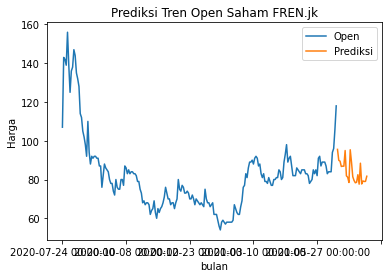

In [ ]:
dataset_freen['Open'].plot()
dataset_freen['Prediksi'].plot()
plt.legend()
plt.xlabel('bulan')
plt.ylabel('Harga')
plt.title('Prediksi Tren Open Saham FREN.jk')
plt.show()